# Project: No Show Appointment trends 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze this dataset whis has information from 100k medical appointments in Brazil and it focuses on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.
    <li><a>  ‘ScheduledDay’ tells us on what day the patient set up their appointment.</a></li>
    <li><a>  ‘Neighborhood’ indicates the location of the hospital.</a></li>
    <li><a>  ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</a></li>
    <li><a>  'No-show': It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</a></li>
    
> We will look at the following questions when we will explore the data 
    <li><a> 1. Does Gender play a role in showing up for appointment?
    <li><a> 2. Does the Receiving SMS effect appointment show up?
    <li><a> 3. Are there Neighbourhood's where Appointment show up is high?
    <li><a> 4. Does scholarship effect appointment show up?
    <li><a> 5. Does the waiting time and Age effect the Appointent Show up ?

In [1]:
# Used this cell to set up import statements for all of the packages that will be used.
# Included a 'magic word' so that our visualizations are plotted inline with the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> In this section we are going to load the data, look at the types, unique features and decide what needs to be done for Data cleaning. 

> It is also to be noted that in the categorical columns Scholarship, Hipertension, Diabetes, Alcoholism, Hahandcap and SMS_received ) means NO / Negative while 1 means Yes/Positive

### General Properties

In [2]:
# Loaded our data and printed out a few lines. 
df = pd.read_csv(r'C:\Users\sagat\Downloads\Nanodegree\noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
# Performed operations to inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Now we know the toal no. of rows are 110527 and there are 14 columns. Also we no there are no missing data as well.

> Also note that the Schedule date and Appointment date are object type. We will change it to datetime object while cleaning the data.

> We will also need to rename a few columns with the right spelling

In [4]:
# Taking a look at the summary statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The data seems pretty clean and does not have any missing values 
> However we notice that the min age is -1, which is not possible

In [5]:
# We will do value counts of each age groups to check for the number of discrepencies
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

> It looks like there was only one row with age -1. 

In [6]:
#let's take a look and see if there are any duplicate data
df.duplicated(subset = 'AppointmentID').value_counts()

False    110527
dtype: int64

> The data does not seem to have any duplicate values for appointment id. Note that we are not checking for duplictes
  in other columns because they are expected to have duplictes and PatientId is not used because 1 patient can visit multiple times. Therefore we are looking for unique AppointmentId's.

In [7]:
#Looking at how many different neighbourhood are there
df['Neighbourhood'].nunique()

81

> Important columns to analyze data : Age,Gender, Scholarship, Reasons for visiting(ex, Hypertension,Diabetes),sms_received,no-show. We have to clean these columns in order to analyze effectively.

In [8]:
# Finding the value counts of people with and without Hipertension
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [9]:
# Finding the value counts of people with and without Diabetes
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [10]:
# Finding the value counts of people with and without Alcoholism
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

> For Hipertension, Diabetes and Alcoholism we notice that the non affected people are more than affected people. What will be interesting is to check how it relates to showing up for appointments. 

In [11]:
# Finding the value counts of people with and without Handcap
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> In the Handcap column here 0,1,2,3,4 may mean anything.We can't be sure about this column without more information.Thus, we will not use it for further analysis.

In [12]:
# Finding the value counts of people who received and who didn't receive SMS
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

> Number of people who received the SMS is less than the number of people who haven't

## Summary of Data Wrangling

> It looks like there was only one row with age -1. We will drop this row

> We will also need to rename a few columns with the right spelling
  
> We will make a new Categorical(int type) column 'Show' to help with further analysis

> Also note that the Schedule date and Appointment date are object type. We will change it to datetime object while cleaning the data.

> Drop handcap column

### Data Cleaning 

In [13]:
#It is impossible to determine the age corresponding to the patient in this case.
#Creating a new dataframe called df_clean that includes all rows where the value of Age is not equal to -1
df_clean = df[df.Age != -1]

In [14]:
df_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [15]:
# Checking to see if the columns have been dropped
df_clean.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

> We see that the -1 age row has been removed

In [16]:
#Renaming columns with correct spelling
df_clean.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

C:\Users\sagat\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
df_clean.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [18]:
# Creating a new categorical column to indicate if patient shows or not
df_clean["Show"] = df_clean["No-show"].apply(lambda x : 1 if (x == 'No') else 0)

C:\Users\sagat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Let's calculate the waiting time of appointments (AppointmentDay -ScheduleDay)
# To do this we would have to convert these columns to datetime first
app_day = pd.to_datetime(df_clean["AppointmentDay"])
sch_day =  pd.to_datetime(df_clean["ScheduledDay"])
wait_time = app_day -sch_day
df_clean["waiting"] = pd.DataFrame(wait_time)
df_clean["waiting"] =(df_clean.waiting/np.timedelta64(1, 'D')).astype(int)
# Filtering the dataset to get the waiting period greater than or equal to 0
df_clean = df_clean[df_clean.waiting >= 0]

C:\Users\sagat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sagat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null object
AppointmentDay    110521 non-null object
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hypertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handicap          110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
Show              110521 non-null int64
waiting           110521 non-null int32
dtypes: float64(1), int32(1), int64(9), object(5)
memory usage: 13.9+ MB


> We notice that 6 rows have been dropped. 1 of then was the -1 age. The others may be where the scheduled time or the appointment time were not entered properly. 

In [21]:
# Dropping columns that are not required for further analysis 
df_clean = df_clean.drop(['PatientId' ,'ScheduledDay', 'AppointmentDay', 'No-show', 'Handicap' ], axis = 1)

In [22]:
# Checking to see the changes
df_clean.head(2)

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Show,waiting
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,1,0
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis

> 

###   1 - Does Gender play a role in showing up for appointment

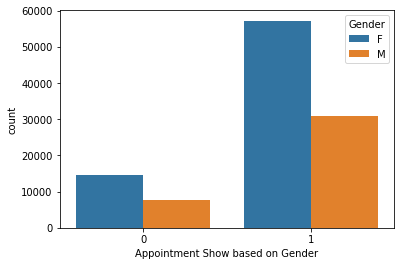

In [23]:
# Observing No-show between males and females
sns.countplot(x='Show',hue='Gender', data=df_clean)
plt.xlabel('Appointment Show based on Gender')
plt.show()

> From the graph we can say that the number of females who show up for appointment is more than males
> Similarly the number of females who don't show up are also more than men.
> To make it more clear lets find the percentages

In [24]:
#We can say that, females have more no-show than man do. 
male_show=df_clean[(df_clean['Gender']=='M') & (df_clean['Show']==1)].count()
female_show=df_clean[(df_clean['Gender']=='F') & (df_clean['Show']==1)].count()
total_Men=len((df_clean['Gender']=='M'))
total_Women=len((df_clean['Gender']=='F'))
percentage_of_Women=(female_show/total_Women)*100
percentage_of_men=(male_show/total_Men)*100
print("Percentage of female who did show up ",np.round(percentage_of_Women['Gender'],0),"%")
print("Percentage of male who did show up ",np.round(percentage_of_men['Gender'],0),"%")

Percentage of female who did show up  52.0 %
Percentage of male who did show up  28.0 %


### 2. Does the Receiving SMS effect appointment show up 

Text(0.5, 1.0, 'SMS recieved ')

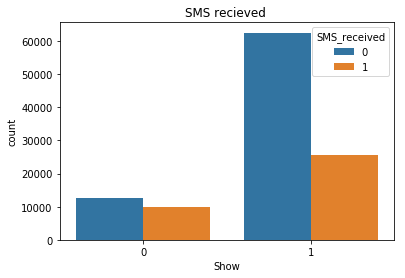

In [25]:
 # Lets simply check first wheather receiving SMS affects the appointment show-up
sns.countplot(x='Show',hue='SMS_received', data=df_clean);
plt.title('SMS recieved ')

> From the graph we see that the number of people who show up for the appointment after receiving a SMS is more than
>those who did not show up and didn't receive a SMS

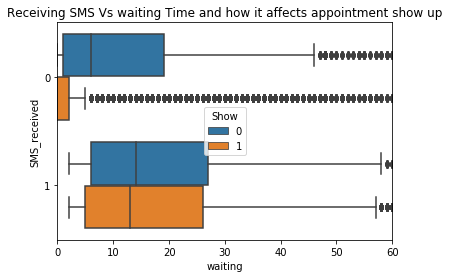

In [26]:
# Now have a box plot and look at how increasing waiting time affects Appointment show up,
# when you receive a SMS vs when you dont
sns.boxplot(x='waiting', y='SMS_received', hue='Show', data=df_clean,orient='h')
plt.xlim(0,60)
plt.title('Receiving SMS Vs waiting Time and how it affects appointment show up')
plt.show()

> While receiving SMS increases the number of people showing up,
> increasing wait time also increases the number of people not showing up. 

###  3. Are there Neighbourhood's where Appointment show up is high?

> As we know already there are 81 unique Neighbourhood
> Here we will look at the top 25 neighbourhood's where the appointment showup is high

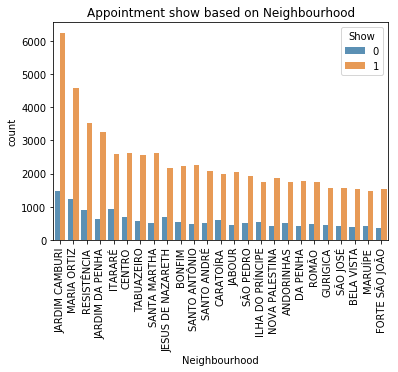

<Figure size 720x360 with 0 Axes>

In [27]:
# Plotting a count plot with the top 25 Neighbourhood's
sns.countplot(x='Neighbourhood', hue='Show', data=df_clean, alpha=0.8, order=df_clean.Neighbourhood.value_counts().iloc[:25].index);
plt.xticks(rotation=90)
plt.title('Appointment show based on Neighbourhood')
plt.figure(figsize=(10,5))
plt.show()

> From the graph we can say that certain Neighbourhood's like Jardim Camburi, Maria Ortiz and Resistencia has
> much higher show up counts than other neighbourhood's

> Let's also look at the Bottom 20 Neighbourhood's. 

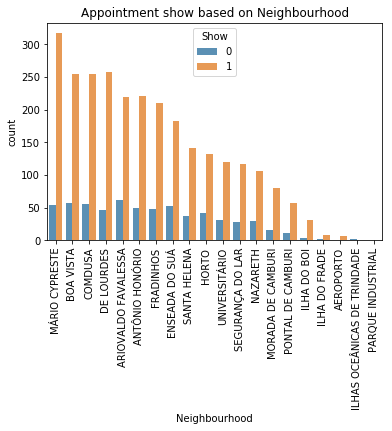

<Figure size 720x360 with 0 Axes>

In [28]:
# Plotting a count plot with the bottom 20 Neighbourhood's
sns.countplot(x='Neighbourhood', hue='Show', data=df_clean, alpha=0.8, order=df_clean.Neighbourhood.value_counts().iloc[61:81].index);
plt.xticks(rotation=90)
plt.title('Appointment show based on Neighbourhood')
plt.figure(figsize=(10,5))
plt.show()

> Some of the lowest ranking Neighbourhood's has counts even less than 10. 

### 4. Does scholarship effect appointment show up ?

Text(0.5, 1.0, 'Scholarship and appointment show up')

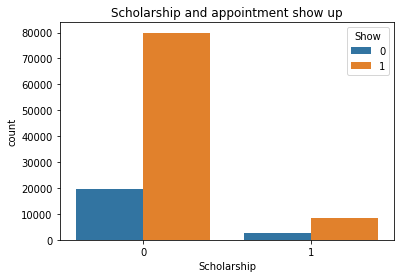

In [29]:
# Bar plot to look at weather Scholarship effects number of people showing up 
sns.countplot(x='Scholarship',hue='Show', data=df_clean);
plt.title('Scholarship and appointment show up')

> It look as if Scholarship doesn't really help with appointment show up 

### 5. Does the waiting time and Age effect the Appointent Show up ?

Text(0.5, 1.0, 'Scatter plot of Waiting time vs Age')

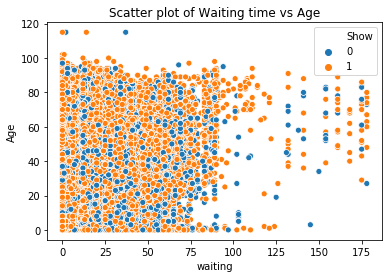

In [30]:
# Let's plot a scatter plot and observe how age and waiting time relates to Appointment show up
sns.scatterplot(data = df_clean, x = 'waiting', y= 'Age', hue = 'Show');
plt.title('Scatter plot of Waiting time vs Age')

> The graph above shows that as the waiting time increases people show up gets scarce
> Also looking at the graph it seems that Age>60 show up more than Age<60. 
> However, further analysis would be required to concluded anything

<a id='conclusions'></a>
## Conclusions

> There is some association negative/positive between patients' likelihood of showing up and below variables:

>Gender - Percentage of female who did show up  52.0 %
          Percentage of male who did show up  28.0 %
          
>Neighbourhood - There are some neighbourhood that has much higher show up numbers than others. 

>Age and Waiting time - The waiting time increases people show up gets scarce Also looking at the graph it seems that Age>60 show up more than Age<60

> Schoralship - It doesn't affect the appointment show up greatly.

> SMS received and Waiting time - Receiving SMS increases the number of people showing up while increasing wait time increases the number of people not showing up.


### Limitations 

> Further statistical analysis is required to come to a plausible conclusion. 

> A bigger sample size will help with with the analysis. One reason for this is that for example there were some neighbourhood's with less than 10 show up's. Now this could be actually true, or maybe the dataset isn't big enough.

> Having an estimate of the population of each Neighbourhood's would be helpful in comming to a conclusion.

> Also having another column for approx annual income of the patients would have helped us tell if that was an issue. 